# Dark Matter Coupled to Top Quark

## General informations

<br>

<div style='color:red'>
The 2D plots need to be corrected. Right now, they seem to show the y-axis reversed ($y=-y$).
</div>


### The model

We consider a simplified dark matter model with a new interaction field (mediator) is responsible for the weak interaction between the ordinary matter and the introduced dark matter candidate. The particular model we are interested in relies on a coupling between dark matter and the top quark, which was designed to lead to $t+E^{\text{miss}}_{T}$, so-called monotop final state: <a href="https://arxiv.org/abs/1407.7529"> Revisiting monotop production at the LHC (JHEP01 (2015) 017)</a>. In the non-resonant model case of this publication (on which we will focus), the general lagrangian density is:

$$
\mathcal{L}_{\mathrm{DM}} \; = \; \mathcal{L}_{\mathrm{kin}} [\chi, V_\mu] \; 
+ \;  V_\mu \, \left( \, a^{ij}_L \, \bar{u}_{i,L} \gamma^{\mu} u_{j,L} \:+\:  a^{ij}_R \, \bar{u}_{i,R} \gamma^{\mu} u_{j,R} \, \right) \;+\; V_\mu \, \left(\, g_L \, \bar{\chi}_L {\gamma^\mu} \chi_L \:+\: g_R\, \bar{\chi}_R {\gamma^\mu} \chi_R \,\right)
$$

where the matrices $a^{ij}_L$ and $a^{ij}_R$ describe the couplings in the flavour space for left-handed and right-handed components of quarks. The interaction between the dark matter and the mediator are determined by $g_L$ and $g_R$. These parameters have a priori a real and an imaginary part.

### Simplifications

In order to simplify the model, we restrict the possible couplings only between the first and third generation. In addition, in order to evade $b$-physics constraints we assume only right-handed couplings. Indeed, an interaction term with the left-handed components would automatically involve the $b$-quark because of the $\text{SU}(2)_{\text{L}}$ symmetry, which is strongly excluded by current data. Finally, we assume vectorial interaction with the dark matter so that $g_R=g_L$. Within these assumptions, the dynamic of the new fields is described by the following lagrangian density:

$$
\mathcal{L}_{\mathrm{DM}} \; = \;  \mathcal{L}_{\mathrm{kin}} [\chi, V_\mu] \; + \; g_{\text{SM}} \: V_\mu \: \bar{t}_R \gamma^\mu u_R \;+ \; g_{\text{DM}} \: V_\mu \: \bar{\chi} {\gamma^\mu} \chi
$$

where $g_{\text{SM}} \equiv a^{13}_R$ and $g_{\text{DM}} \equiv g_R=g_L$. In this context, the model is fully predictive once four parameters are fixed: $(m_V,m_{\chi},g_{\text{SM}}, g_{\text{DM}})$. The new interations leads to the two additional vertices $Vt\bar{u}$ and $V\chi\bar{\chi}$ with respect to the SM.

### Relevant Processes and Final States

There are two experimentally interesting final states to probe this model: $t+E^{\text{miss}}_{T}$ and $tt+X$. The first one is obtained via the process $gu \to tV \to t\chi\bar{\chi}$ while the second one can be obtained via $gu \to tV \to tt\bar{u}$ (together with two other diagrams like $t$-channel exchange of $V$ in $uu\to tt$). This makes the two final states complementary since they allow together to probe the model of any value of BR$_{\chi}$.

### Analytical Expressions

Depending on the parameter values, the signature can be then quite different and it's important to properly model these features, via for e.g. BR$_{\chi}$. Also, for a given final state, the width of the mediator can also lead to differences in event kinematics which also need to be accounted for. The following analytical expression give the relation between the mediator properties and the model paramters at the leading order.

$$
\Gamma_{V} \; = \; \Gamma_{V\to\chi\chi} + \Gamma_{V\to t\bar{u}+\bar{t}u} ~~~~~ ; ~~~~~ \text{BR}_{\chi} \;= \; \frac{\Gamma_{V\to\chi\chi}}{\Gamma_{V}}
$$

$$
\Gamma_{V\to\chi\chi} \; = \; \frac{m_V}{12\pi} \: g_\text{DM}^2 \: \sqrt{1-4\frac{m^2_{\chi}}{m^2_V}} \: \left(1+2\frac{m^2_{\chi}}{m^2_V}\right) ~~~~~ ; ~~~~~ \Gamma_{V\to t\bar{u}+\bar{t}u} \; = \; \frac{m_V}{\pi}\: g_\text{SM}^2  \: \left(1-\frac{m^2_t}{m^2_V}\right) \: \left(1-\frac{m^2_t}{2m^2_V} - \frac{m^4_t}{2m^4_V}\right)
$$



## Numerical analysis

### General informations

A python module, ModelParaRelation, was written in order play with the analytical formulas above, the main goal being to have a feeling of how the mediator properties are related to the model parameters. The total width as a function of mediator mass is plotted and then the evolution of the invisible BR with respect to coupling constants is also looked at. Finally, we check how the couplings constants evolves as a function of the BR.

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib        as mpl
import ModelParaRelation as model
%matplotlib inline
mV=1000; mDM=1;

# Ignore warning related to undefined division
np.seterr(divide='ignore', invalid='ignore') 

# Plot settings
mpl.rcParams['legend.frameon' ] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize' ] = 18
mpl.rcParams['axes.labelsize' ] = 18
mpl.rcParams['lines.linewidth'] = 2.5

### Mediator width as function of its mass

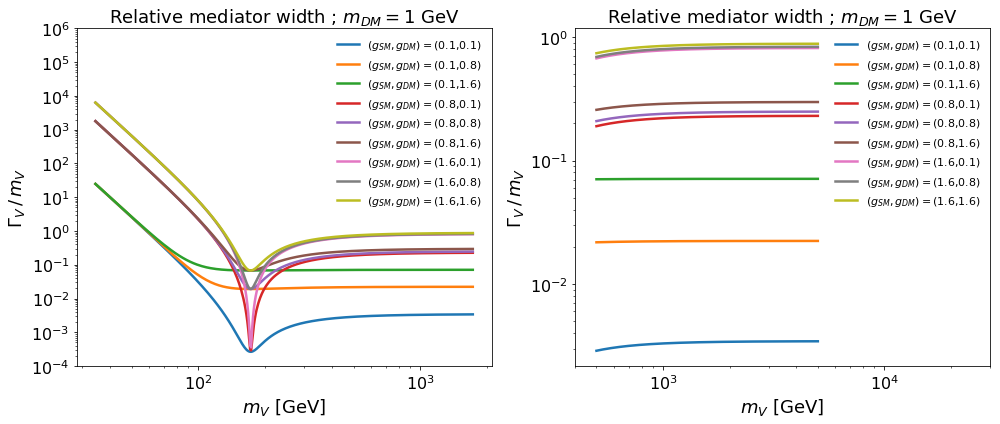

In [2]:
gDM = np.linspace(0.1,1.6,3)
gSM = np.linspace(0.1,1.6,3)
g2D = np.array( np.meshgrid(gSM,gDM) ) # 2D grid but 3*3 array
g2D = g2D.T                            # 2D grid but 3*3 transposed array
g2D = g2D.reshape(-1,2)                # 2D grid but 2*6 array --> what we want

# Mediator masses
m1 = np.linspace(model.mt/5, model.mt*10,1000)
m2 = np.linspace(500, 5000,1000)

# Plots
plt.figure(figsize=(14,6))
Title='Relative mediator width ; $m_{DM}=$' + '{:.0f} GeV'.format(mDM)

plt.subplot(121)
plt.loglog()
plt.title(Title)
plt.ylim(1e-4, 1e6)
plt.ylabel('$\Gamma_V \,/\, m_V$')
plt.xlabel('$m_V$ [GeV]')
for g in g2D:
    gSM=g[0];gDM=g[1]
    leg_label='$(g_{SM},g_{DM})=$'+'({:1.1f},{:1.1f})'.format(gSM,gDM)
    plt.plot(m1,model.get_total_width(gSM,gDM,m1,mDM)/m1, label=leg_label)
plt.legend(fontsize='11')

plt.subplot(122)
plt.loglog()
plt.title(Title)
plt.ylabel('$\Gamma_V \,/\, m_V$')
plt.xlabel('$m_V$ [GeV]')
plt.xlim(400, 3e4)
for g in g2D:
    gSM=g[0];gDM=g[1]
    leg_label='$(g_{SM},g_{DM})=$'+'({:1.1f},{:1.1f})'.format(gSM,gDM)
    plt.plot(m2,model.get_total_width(gSM,gDM,m2,mDM)/m2, label=leg_label)
plt.legend(fontsize='11')

plt.tight_layout()
plt.savefig('TotalWidth_vs_mV.pdf')

### Mediator width and invisible BR: function SM coupling

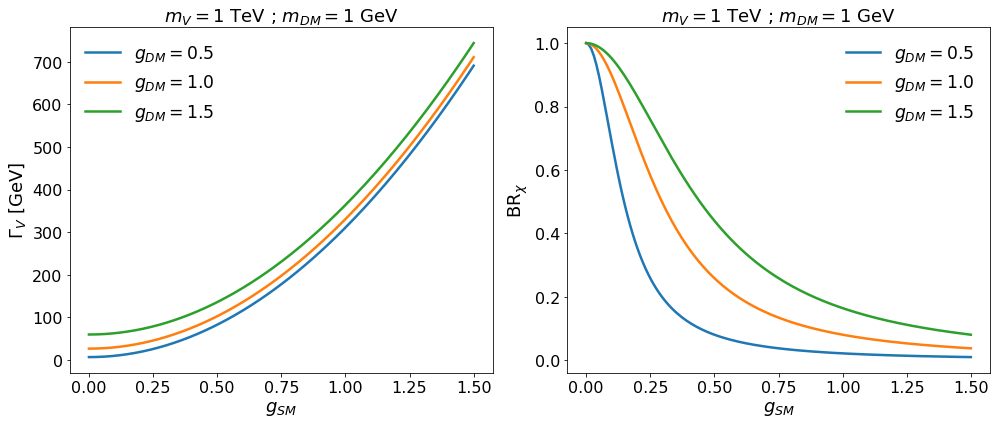

In [3]:
gDM=[0.5,1,1.5]
g = np.linspace(0,1.5,150)

plotTitle='$m_V=$'+'{:.0f} TeV'.format(mV/1000.) + ' ; $m_{DM}=$' + '{:.0f} GeV'.format(mDM)

plt.figure(figsize=(14,6))
plt.subplot(121)    
plt.title( plotTitle )
plt.xlabel('$g_{SM}$')
plt.ylabel('$\Gamma_V$ [GeV]')
for gdm in gDM: plt.plot( g, model.get_total_width(g,gdm,mV,mDM) , label='$g_{DM}=$'+'{:1.1f}'.format(gdm))
plt.legend()

plt.subplot(122)
plt.title( plotTitle )
for gdm in gDM: plt.plot( g, model.get_BR(g,gdm,mV,mDM) , label='$g_{DM}=$'+'{:1.1f}'.format(gdm))
plt.xlabel('$g_{SM}$')
plt.ylabel('BR$_{\chi}$')
plt.legend()

plt.tight_layout()
plt.savefig('SMcouplingsDep.pdf')

### Mediator width and invisible BR: function of both couplings

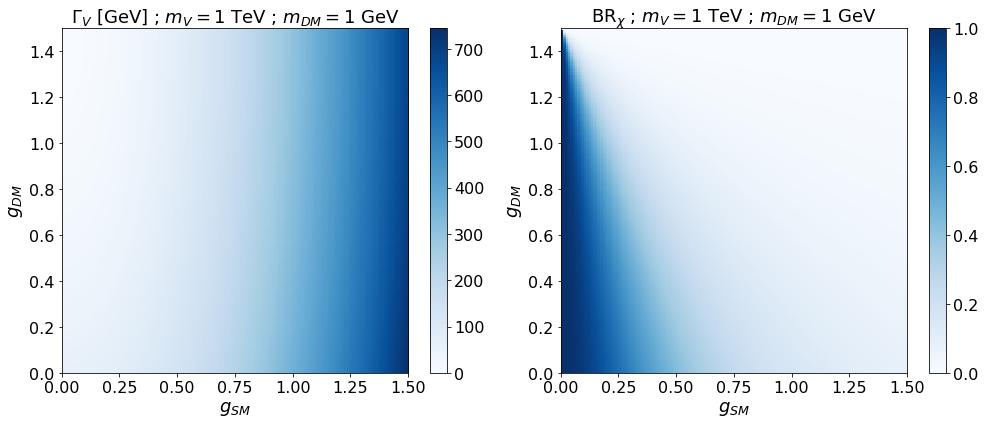

In [7]:
gSM     = np.linspace(0,1.5,150)
gDM     = np.linspace(0,1.5,150)
gSM,gDM = np.meshgrid(gSM,gDM)
BR      = model.get_BR(gSM,gDM,mV,mDM)
Gamma   = model.get_total_width(gSM,gDM,mV,mDM)

plt.figure(figsize=(14,6))
plotTitle='$m_V=$'+'{:.0f} TeV'.format(mV/1000.) + ' ; $m_{DM}=$' + '{:.0f} GeV'.format(mDM)

plt.subplot(121)
#plt.pcolor(gSM, gDM, Gamma, cmap='Blues') --> This makes some blank line because of the meshgrid
plt.imshow(Gamma, interpolation='none', cmap='Blues',           # choose Z(x,y), interpolation and color
           extent=[gSM.min(), gSM.max(), gDM.min(), gDM.max()], # give proper range for x/y axis
           aspect='auto')                                       # fill the whole figure
plt.title('$\Gamma_V$ [GeV] ; ' + plotTitle)
plt.xlabel('$g_{SM}$')
plt.ylabel('$g_{DM}$')
plt.colorbar()

plt.subplot(122)
plt.imshow(BR, interpolation='none', cmap='Blues', 
           extent=[gSM.min(), gSM.max(), gDM.min(), gDM.max()], 
           aspect='auto' )
plt.title('BR$_{\chi}$ ; ' + plotTitle)
plt.xlabel('$g_{SM}$')
plt.ylabel('$g_{DM}$')
plt.colorbar()

plt.tight_layout()
plt.savefig('BRandGammavsCouplings.pdf')

### Mediator couplings as function of invisible BR and width

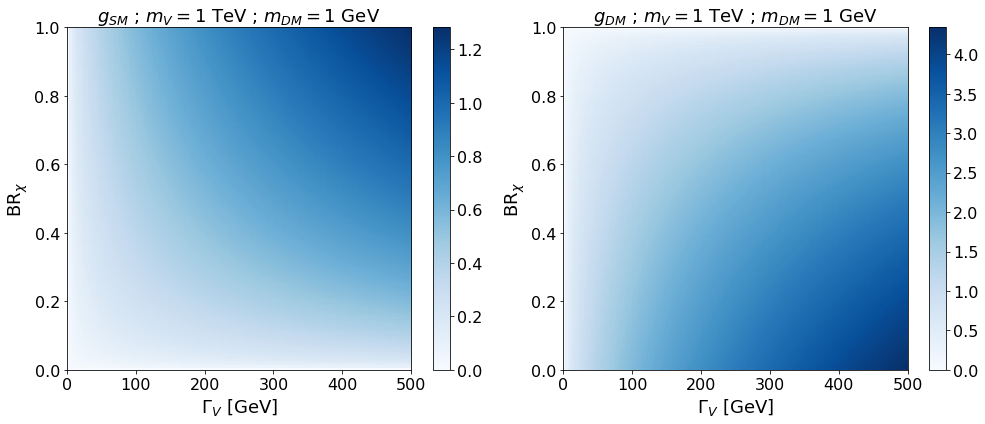

In [8]:
mV=1000; mDM=1;
GV    = np.linspace(0.0,500,150)
BR    = np.linspace(0.0,1.0,150)
GV,BR = np.meshgrid(GV,BR)
g_SM  = model.get_gSM_from_BRwidth(BR,GV,mV,mDM)
g_DM  = model.get_gDM_from_BRwidth(BR,GV,mV,mDM)


plt.figure(figsize=(14,6))
plotTitle='$m_V=$'+'{:.0f} TeV'.format(mV/1000.) + ' ; $m_{DM}=$' + '{:.0f} GeV'.format(mDM)

plt.subplot(121)
plt.imshow(g_SM, interpolation='none', cmap='Blues', 
           extent=[GV.min(), GV.max(), BR.min(), BR.max()], 
           aspect='auto')
plt.title('$g_{SM}$ ; ' + plotTitle)
plt.xlabel('$\Gamma_{V}$ [GeV]')
plt.ylabel('BR$_{\chi}$')
plt.colorbar()

plt.subplot(122)
plt.xlim(GV.min(), GV.max())
plt.ylim(BR.min(), BR.max())
plt.imshow(g_DM, interpolation='none', cmap='Blues', 
           extent=[GV.min(), GV.max(), BR.min(), BR.max()], 
           aspect='auto')
plt.title('$g_{DM}$ ; ' + plotTitle)
plt.xlabel('$\Gamma_{V}$ [GeV]')
plt.ylabel('BR$_{\chi}$')
plt.colorbar()

plt.tight_layout()
plt.savefig('BRandGammavsCouplings.pdf')